<a href="https://colab.research.google.com/github/hawa1983/MG-628/blob/main/MG628_Week5_Descriptive_Analytics__Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Majors + Public Administration Majors

**Assignment Overview**

Use Python in a Jupyter Notebook to perform descriptive analytics on a sales dataset and create visualizations that support managerial decision-making.

## Task 1: Load the Dataset


What to Do: Load the CSV file into a Pandas DataFrame.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('sales_assignment_dataset.csv')
display(df.head(10))

,Date,Product,Region,Salesperson,Units Sold,Unit Price,Total Revenue
0,3/4/2023,Smartphone,North,Diana,43,449.96,19348.28
1,2/2/2023,Keyboard,East,Diana,19,750.65,14262.35
2,1/26/2024,Laptop,West,Charlie,14,1214.30,17000.20
3,4/20/2023,Tablet,South,Alice,18,572.33,10301.94
4,8/7/2023,Keyboard,North,Diana,48,65.47,3142.56
5,3/4/2023,Monitor,South,Ethan,29,805.45,23358.05
6,5/27/2023,Monitor,East,Diana,31,1406.33,43596.23
7,12/27/2023,Smartphone,West,Bob,29,1015.04,29436.16
8,12/8/2024,Tablet,East,Ethan,48,250.55,12026.40
9,4/24/2024,Smartphone,West,Charlie,38,716.52,27227.76


## Task 2: Display the Data Structure

What to Do: Display the first 10 rows to understand the structure of the data.



In [8]:
# Display first 10 rows print(df.head(10)) # Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           200 non-null    object 
 1   Product        200 non-null    object 
 2   Region         200 non-null    object 
 3   Salesperson    200 non-null    object 
 4   Units Sold     200 non-null    int64  
 5   Unit Price     200 non-null    float64
 6   Total Revenue  200 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB
None


## Task 3: Calculate Descriptive Statistics


What to Do: Calculate the following statistics for Units Sold, Unit Price, and Total Revenue: Count, Mean, Median, Mode, Standard Deviation, Minimum, and Maximum.



In [9]:
# Basic descriptive statistics
print(df[['Units Sold', 'Unit Price', 'Total Revenue']].describe())

# Calculate median separately
print("\nMedian Values:")

print(df[['Units Sold', 'Unit Price', 'Total Revenue']].median())

# Calculate mode separately
print("\nMode Values:")
print(df[['Units Sold', 'Unit Price', 'Total Revenue']].mode().iloc[0])

       Units Sold   Unit Price  Total Revenue
count  200.000000   200.000000     200.000000
mean    28.070000   771.937500   21472.177250
std     13.533324   414.721191   16401.613478
min      1.000000    52.190000     510.570000
25%     18.000000   447.890000    8712.457500
50%     29.000000   781.960000   17638.580000
75%     40.000000  1175.820000   31916.167500
max     50.000000  1492.590000   73136.910000

Median Values:
Units Sold          29.00
Unit Price         781.96
Total Revenue    17638.58
dtype: float64

Mode Values:
Units Sold        35.00
Unit Price        52.19
Total Revenue    510.57
Name: 0, dtype: float64


## Task 4: Total Revenue by Product - Bar Chart

What to Do: Create a bar chart showing total revenue for each product.

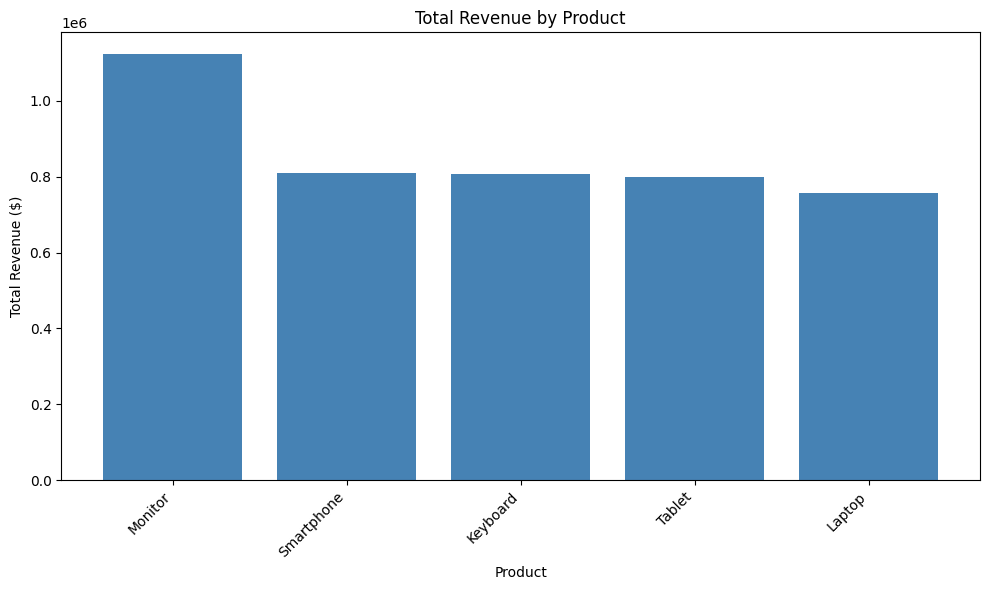

In [10]:
# Calculate total revenue by product
revenue_by_product = df.groupby('Product')['Total Revenue'].sum().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_product.index, revenue_by_product.values, color='steelblue')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.title('Total Revenue by Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() # Print the values print(revenue_by_product)

## Task 5: Total Revenue by Region - Bar Chart

What to Do: Create a bar chart showing total revenue for each region.



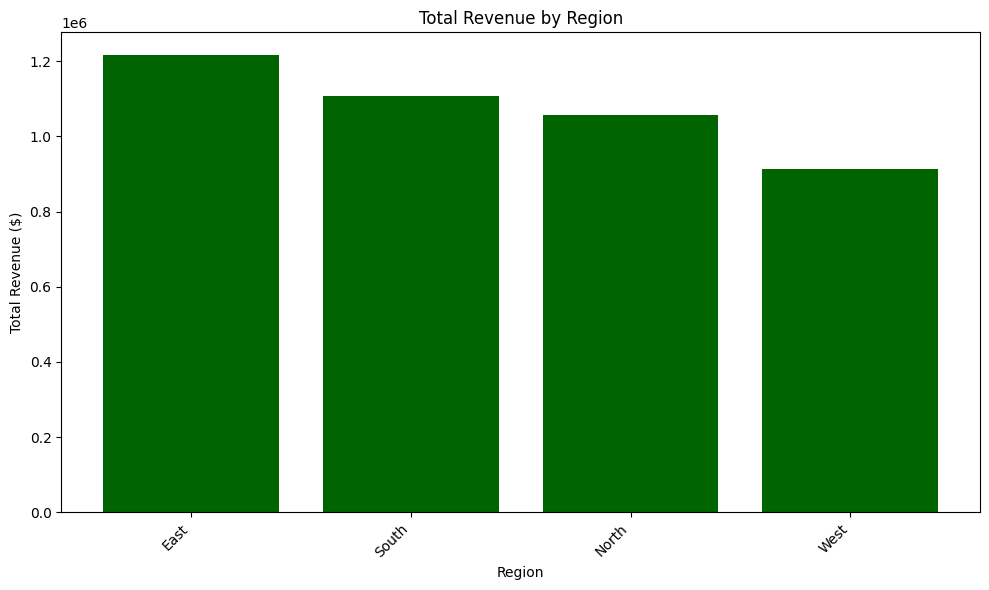

In [11]:
# Calculate total revenue by region
revenue_by_region = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_region.index, revenue_by_region.values, color='darkgreen')
plt.xlabel('Region')
plt.ylabel('Total Revenue ($)')
plt.title('Total Revenue by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() # Print the values print(revenue_by_region)

## Task 6: Unit Price Distribution Analysis


What to Do: Create a histogram to analyze the distribution of unit prices.

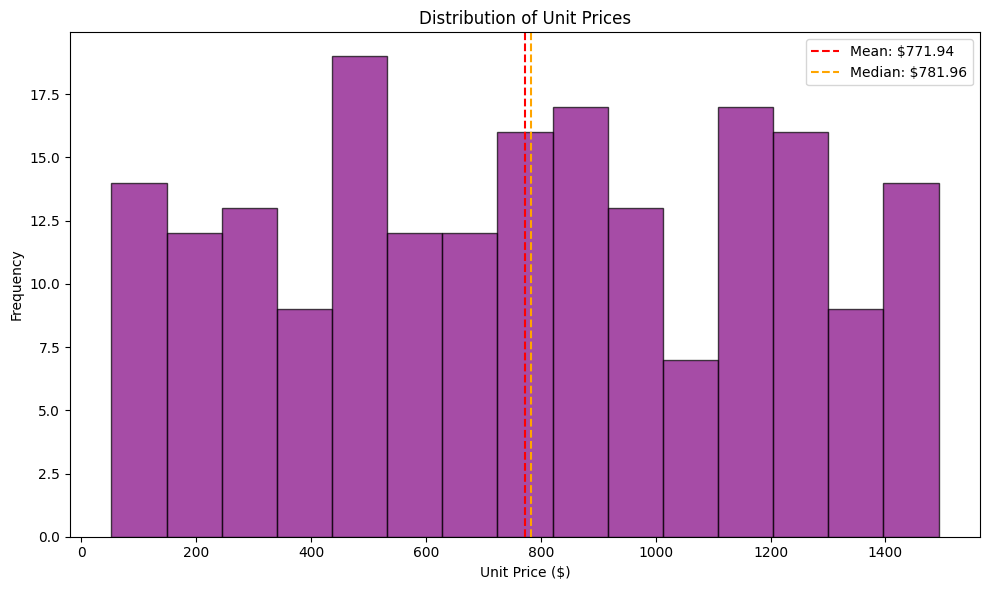

In [12]:
# Create histogram for Unit Price
plt.figure(figsize=(10, 6))
plt.hist(df['Unit Price'], bins=15, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Unit Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Prices')
plt.axvline(df['Unit Price'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Unit Price"].mean():.2f}')
plt.axvline(df['Unit Price'].median(), color='orange', linestyle='--', label=f'Median: ${df["Unit Price"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

## Task 7: Outlier Detection

What to Do: Identify outliers in Units Sold and Total Revenue using box plots and the IQR method.




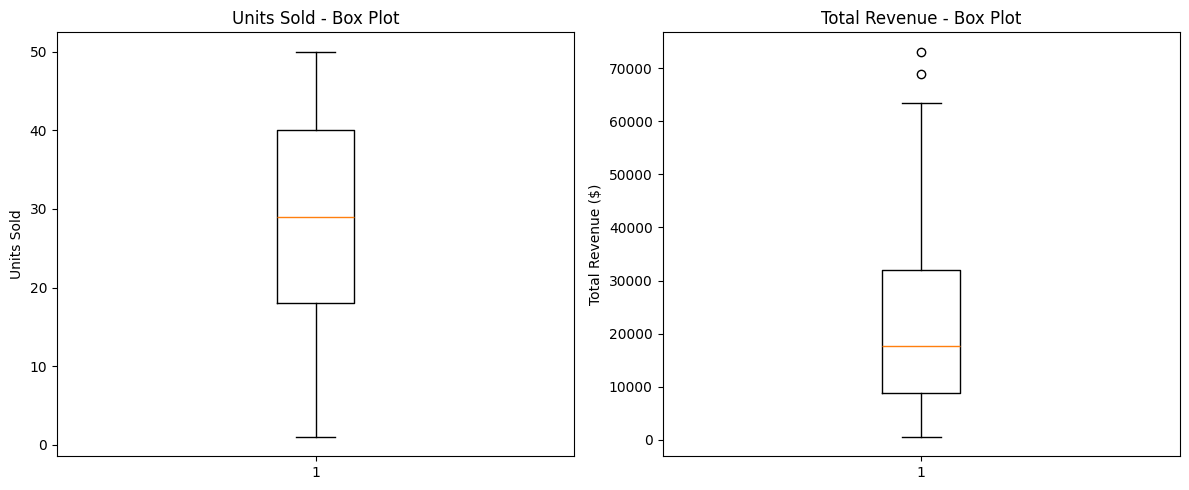

Units Sold Outliers: 0
Total Revenue Outliers: 2


In [13]:
# Create box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(df['Units Sold'])
axes[0].set_title('Units Sold - Box Plot')
axes[0].set_ylabel('Units Sold')

axes[1].boxplot(df['Total Revenue'])
axes[1].set_title('Total Revenue - Box Plot')
axes[1].set_ylabel('Total Revenue ($)')

plt.tight_layout()
plt.show()


# Calculate IQR for outlier detection
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower) | (df[column] > upper)]

    return len(outliers), lower, upper


units_out, units_low, units_up = detect_outliers('Units Sold')
rev_out, rev_low, rev_up = detect_outliers('Total Revenue')

print(f"Units Sold Outliers: {units_out}")
print(f"Total Revenue Outliers: {rev_out}")


## Instructions for Creating Descriptive Statistic Summary:

### Step 1: Load the dataset: Import sales_assignment_dataset.csv into a Pandas DataFrame.

already done above. repeated here

In [15]:
# Load the dataset
df = pd.read_csv('sales_assignment_dataset.csv')

### Step 2: Initial Inspection: Display the first 10 rows to understand the structure of the clinical data.

In [16]:
display(df.head(10))

,Date,Product,Region,Salesperson,Units Sold,Unit Price,Total Revenue
0,3/4/2023,Smartphone,North,Diana,43,449.96,19348.28
1,2/2/2023,Keyboard,East,Diana,19,750.65,14262.35
2,1/26/2024,Laptop,West,Charlie,14,1214.30,17000.20
3,4/20/2023,Tablet,South,Alice,18,572.33,10301.94
4,8/7/2023,Keyboard,North,Diana,48,65.47,3142.56
5,3/4/2023,Monitor,South,Ethan,29,805.45,23358.05
6,5/27/2023,Monitor,East,Diana,31,1406.33,43596.23
7,12/27/2023,Smartphone,West,Bob,29,1015.04,29436.16
8,12/8/2024,Tablet,East,Ethan,48,250.55,12026.40
9,4/24/2024,Smartphone,West,Charlie,38,716.52,27227.76


### Step 3: Create these 3 columns in your spreadsheet:

* Units Sold (Volume)
* Unit Price  (Unit Cost)
* Total Revenue(Revenue)


In [17]:
unit_sold = df['Units Sold']
unit_price = df['Unit Price']
total_revenue = df['Total Revenue']

### Step 4: For each column, calculate the count, mean, median, mode, standard deviation, minimum, and maximum (for units sold, unit price, total revenue)


In [22]:
## Count of unit_sold
count_unit_sold = len(unit_sold)
print("Count of Unit Sold = ", count_unit_sold)

## mean of unit_sold
mean_unit_sold = unit_sold.mean()
print("Mean of Unit Sold = ", mean_unit_sold)

## median of unit_sold
median_unit_sold = unit_sold.median()
print("Median of Unit Sold = ", median_unit_sold)

## mode of unit_sold
mode_unit_sold = unit_sold.mode().iloc[0]
print("Mode of Unit Sold = ", mode_unit_sold)

## standard deviation of unit_sold
std_unit_sold = unit_sold.std()
print("Standard Deviation of Unit Sold = ", std_unit_sold)

## minimum of unit_sold
min_unit_sold = unit_sold.min()
print("Minimum of Unit Sold = ", min_unit_sold)

## maximum of unit_sold
max_unit_sold = unit_sold.max()
print("Maximum of Unit Sold = ", max_unit_sold)

## count of unit_price
count_unit_price = len(unit_price)
print("Count of Unit Price = ", count_unit_price)

## mean of unit_price
mean_unit_price = unit_price.mean()
print("Mean of Unit Price = ", mean_unit_price)

## median of unit_price
median_unit_price = unit_price.median()
print("Median of Unit Price = ", median_unit_price)

## mode of unit_price
mode_unit_price = unit_price.mode().iloc[0]
print("Mode of Unit Price = ", mode_unit_price)

## standard deviation of unit_price
std_unit_price = unit_price.std()
print("Standard Deviation of Unit Price = ", std_unit_price)

## minimum of unit_price
median_unit_price = unit_price.median()
print("Median of Unit Price = ", median_unit_price)

## maximum of unit_price
max_unit_price = unit_price.max()
print("Maximum of Unit Price = ", max_unit_price)

## count of total_revenue
count_total_revenue = len(total_revenue)
print("Count of Total Revenue = ", count_total_revenue)

## mean of total_revenue
mean_total_revenue = total_revenue.mean()
print("Mean of Total Revenue = ", mean_total_revenue)

## median of total_revenue
median_total_revenue = total_revenue.median()
print("Median of Total Revenue = ", median_total_revenue)

## mode of total_revenue
mode_total_revenue = total_revenue.mode().iloc
print("Mode of Total Revenue = ", mode_total_revenue)

## standard deviation of total_revenue
std_total_revenue = total_revenue.std()
print("Standard Deviation of Total Revenue = ", std_total_revenue)

## minimum of total_revenue
min_total_revenue = total_revenue.min()
print("Minimum of Total Revenue = ", min_total_revenue)

## maximum of total_revenue
max_total_revenue = total_revenue.max()
print("Maximum of Total Revenue = ", max_total_revenue)




Count of Unit Sold =  200
Mean of Unit Sold =  28.07
Median of Unit Sold =  29.0
Mode of Unit Sold =  35
Standard Deviation of Unit Sold =  13.533323844176515
Minimum of Unit Sold =  1
Maximum of Unit Sold =  50
Count of Unit Price =  200
Mean of Unit Price =  771.9375
Median of Unit Price =  781.96
Mode of Unit Price =  52.19
Standard Deviation of Unit Price =  414.72119111948916
Median of Unit Price =  781.96
Maximum of Unit Price =  1492.59
Count of Total Revenue =  200
Mean of Total Revenue =  21472.177249999997
Median of Total Revenue =  17638.58
Mode of Total Revenue =  <pandas.core.indexing._iLocIndexer object at 0x793ab52d1590>
Standard Deviation of Total Revenue =  16401.613477518564
Minimum of Total Revenue =  510.57
Maximum of Total Revenue =  73136.91


### Compact approach

In [23]:
def summary_stats(series, name):
    print(f"\n{name} Summary Statistics")
    print("-" * 30)
    print(f"Count: {series.count()}")
    print(f"Mean: {series.mean()}")
    print(f"Median: {series.median()}")
    print(f"Mode: {series.mode().iloc[0]}")
    print(f"Standard Deviation: {series.std()}")
    print(f"Minimum: {series.min()}")
    print(f"Maximum: {series.max()}")


summary_stats(unit_sold, "Unit Sold")
summary_stats(unit_price, "Unit Price")
summary_stats(total_revenue, "Total Revenue")



Unit Sold Summary Statistics
------------------------------
Count: 200
Mean: 28.07
Median: 29.0
Mode: 35
Standard Deviation: 13.533323844176515
Minimum: 1
Maximum: 50

Unit Price Summary Statistics
------------------------------
Count: 200
Mean: 771.9375
Median: 781.96
Mode: 52.19
Standard Deviation: 414.72119111948916
Minimum: 52.19
Maximum: 1492.59

Total Revenue Summary Statistics
------------------------------
Count: 200
Mean: 21472.177249999997
Median: 17638.58
Mode: 510.57
Standard Deviation: 16401.613477518564
Minimum: 510.57
Maximum: 73136.91


## Task 8: Executive Summary


What to Do: Write a brief executive summary (1 paragraph, 5-7 sentences) that addresses the following:

Which product generated the highest total revenue?
Which region had the highest sales performance?
What insights did you draw from the distribution of unit prices?
Were there any outliers, and what do they indicate?
What is ONE actionable recommendation for management based on your analysis?


# Healthcare Administration Majors

Descriptive analytics focuses on summarizing historical healthcare data to understand patient volume, resource utilization, and financial performance. It provides the "ground truth" necessary for hospital administrators to make informed staffing and budgeting decisions.

**Assignment Overview**

In this assignment, you will analyze a hospital utilization dataset to calculate key descriptive statistics that help healthcare administrators understand patient volume, costs, and revenue patterns.

**Tools:** Python (Jupyter Notebook) OR Excel

**Dataset:** healthcare_assignment_dataset.csv

* The dataset contains information about sales transactions including product type, region, salesperson, units sold, unit price, and total revenue.


## Options for completing the assignment

**Option 1:** Generate the Dataset via Python

* Using a Jupyter Notebook, simply copy, paste, and run this code. It will create the healthcare_assignment_dataset.csv file in your current folder.

**Option 2:** Sample Data (For Excel Users)

* If you prefer using Excel, here is a representative sample of the data. You can copy this table directly into Excel to practice the assignment functions (like AVERAGE, MEDIAN, and STDEV.S).